<a href="https://colab.research.google.com/github/olimu/Cockroach-NN/blob/main/NN%26Heat_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import sys,os
drive.mount('/content/gdrive', force_remount=True)
import importlib
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')
import LibModel1L
importlib.reload(LibModel1L)
import numpy as np

# define global variables
scale = 10
NPOS = 339
NNEG = 839
IMGX = 24*scale
IMGY = 27*scale

basedirname = '/content/shrink32'
LibModel1L.UnTarShrink32(basedirname, '/content/gdrive/My Drive/Science Fair 19-20/shrink322.tgz')
dirname = basedirname + 'sub'
#dirname = basedirname
print("[INFO] untar ...")
if 'sub' in dirname:
  LibModel1L.UnTarShrink32(dirname, '/content/gdrive/My Drive/Science Fair 19-20/shrink322sub.tgz')
#elif 'crop' in dirname:
  #LibModel1L.UnTarShrink32(dirname, '/content/gdrive/My Drive/Science Fair 2020/shrink322crop.tgz')
NPOS = 350
NNEG = 1500
ver = os.path.basename(dirname) + '_' + str(scale) + '_' + str(NPOS) + '_' + str(NNEG)
model = LibModel1L.TrainShrink(dirname, ver, NPOS, NNEG, IMGX, IMGY)
predictions = LibModel1L.PredictShrink(dirname, model, IMGX, IMGY)
#predsfname = os.path.join('/content/gdrive/My Drive/Science Fair 2020', 'predictions_'+str(scale))
#np.save(predsfname, predictions)
misses, false_hits = LibModel1L.computeMissesAndFalseHits(dirname, predictions, NPOS, NNEG)
#moviebase = os.path.join('/content/gdrive/My Drive/Science Fair 2020', ver)
#LibModel1L.DebugMissesAndFalseHits(basedirname, dirname, predictions, misses, false_hits, IMGX, IMGY, moviebase+'p.mov', moviebase+'n.mov')

Mounted at /content/gdrive
[INFO] untar ...
[INFO] loading images...
positive images =  465
negative images =  23354
data: (1850, 270, 240, 3)
labels: (1850,)
[INFO] compiling model...
[INFO] training network...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
57/57 [==============================] - 48s 278ms/step - loss: 0.4511 - accuracy: 0.8487 - val_loss: 0.1293 - val_accuracy: 0.9546
Epoch 2/25
57/57 [==============================] - 13s 233ms/step - loss: 0.1905 - accuracy: 0.9513 - val_loss: 0.0688 - val_accuracy: 0.9719
Epoch 3/25
57/57 [==============================] - 13s 233ms/step - loss: 0.0875 - accuracy: 0.9742 - val_loss: 0.0495 - val_accuracy: 0.9816
Epoch 4/25
57/57 [==============================] - 13s 235ms/step - loss: 0.0887 - accuracy: 0.9699 - val_loss: 0.0400 - val_accuracy: 0.9849
Epoch 5/25
57/57 [==============================] - 13s 233ms/step - loss: 0.0935 - accuracy: 0.9755 - val_loss: 0.0436 - val_accuracy: 0.9881
Epoch 6/25
57/57 [==============================] - 13s 234ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0375 - val_accuracy: 0.9881
Epoch 7/25
57/57 [==============================] - 13s 233ms/step - loss: 0.0863 - accuracy: 0.9855 - val_loss: 0.0265 - val_accuracy: 0.9914

0/te
0 (None, 270, 240, 20) 4


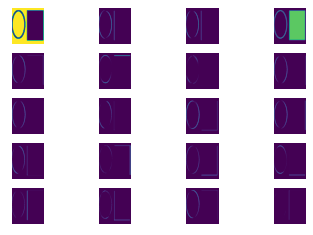

1 (None, 135, 120, 20) 4


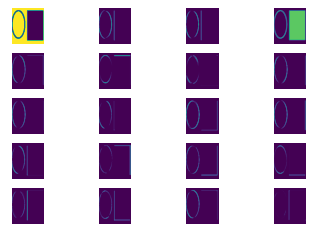

2 (None, 135, 120, 50) 4


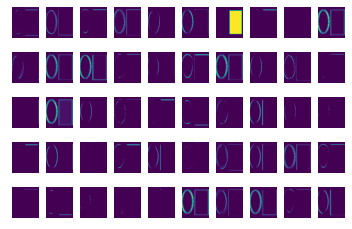

3 (None, 67, 60, 50) 4


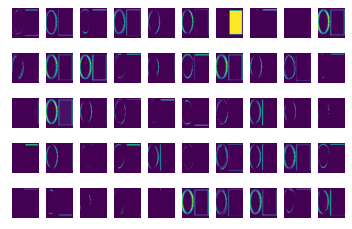

4 (None, 201000) 2
5 (None, 500) 2
6 (None, 2) 2
7 (None, 2) 2
0/te
0 (None, 270, 240, 20) 4


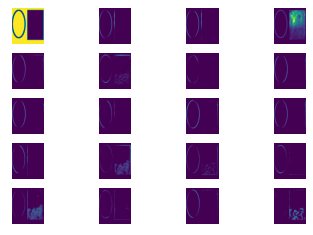

1 (None, 135, 120, 20) 4


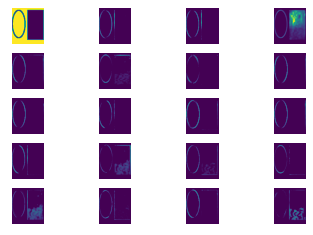

2 (None, 135, 120, 50) 4


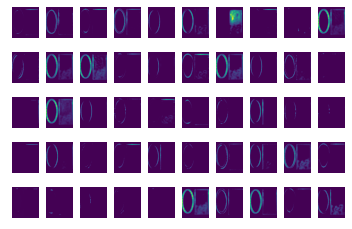

3 (None, 67, 60, 50) 4


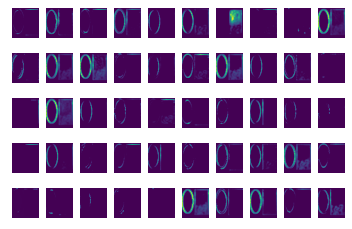

4 (None, 201000) 2
5 (None, 500) 2
6 (None, 2) 2
7 (None, 2) 2


<Figure size 432x288 with 0 Axes>

In [2]:
import cv2 
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from keras.models import Model
import matplotlib.pyplot as plt

imagePaths = ('/content/gdrive/MyDrive/Science Fair 19-20/testbrown.png','/content/gdrive/MyDrive/Science Fair 19-20/testbrownS.png')
#imagePaths = ('/content/shrink32sub/20180310-112750-IMG_6853_p.JPG','/content/shrink32sub/20180310-112750-IMG_6853_p.JPG')
#imagePaths = ('/content/shrink32/20180308-234944-IMG_5550_n.JPG','/content/shrink32/20180308-234944-IMG_5559_n.JPG','/content/shrink32/20180310-112750-IMG_6853_p.JPG','/content/shrink32/20180305-235207-IMG_0999_p.JPG')
#imagePaths = ('/content/shrink32/20180305-235207-IMG_0713_p.JPG','/content/shrink32/20180305-235207-IMG_0713_p.JPG')
for imagePath in imagePaths:
  print(imagePath[41:45])
  image = cv2.imread(imagePath)
  #cv2_imshow(image)
  image = cv2.resize(image, (IMGX, IMGY))
  #cv2_imshow(image)
  #print(image.shape)
  image = img_to_array(image)
  image = expand_dims(image, axis=0)
  for i in range(len(model.layers)):
    modell = Model(inputs=model.inputs, outputs=model.layers[i].output)
    feature_maps = modell.predict(image)
    print(i, modell.output.shape, feature_maps.ndim)
    if feature_maps.ndim == 4:
      n = feature_maps.shape[3]
    else:
      n = 0
    if n == 20:
      for fmap in feature_maps:
	      # plot all 20 maps in an 5x4 shape
        ix = 1
        for _ in range(5):
          for _ in range(4):
			      # specify subplot and turn of axis
            ax = plt.subplot(5, 4, ix)
            ax.set_xticks([])
            ax.set_yticks([])
			      # plot filter channel
            plt.imshow(fmap[:, :, ix-1])
            ix += 1
	      # show the figure
        plt.show()
        #filename='/content/gdrive/My Drive/Science Fair 19-20/layers' + str(i) + '_' + ver + imagePath[41:45] + '.png'
        filename='/content/gdrive/My Drive/Science Fair 19-20/layers' + str(i) + '_' + ver + '.png'
        plt.savefig(filename)
    if n == 50:
      for fmap in feature_maps:
	      # plot all 50 maps in an 5x10 shape
	      ix = 1
	      for _ in range(5):
		      for _ in range(10):
			      # specify subplot and turn of axis
			      ax = plt.subplot(5, 10, ix)
			      ax.set_xticks([])
			      ax.set_yticks([])
			      # plot filter channel
			      plt.imshow(fmap[:, :, ix-1])
			      ix += 1
      # show the figure
      plt.show()
      #filename='/content/gdrive/My Drive/Science Fair 19-20/layers' + str(i) + '_' + imagePath[41:45] + '.png'
      filename='/content/gdrive/My Drive/Science Fair 19-20/layers' + str(i) + '_' + ver + '.png'
      plt.savefig(filename)